<a href="https://colab.research.google.com/github/leonardodarrainrocha/clothing-classification-pytorch-vision/blob/main/clothing_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

### Imports

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


### Data

In [ ]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.87MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.28MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
image, label = train_data[0]
label, image

(9,
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.00

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

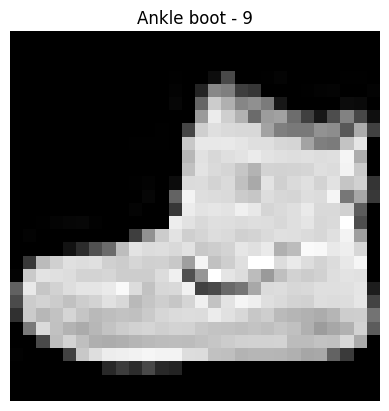

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{class_names[label]} - {label}")
plt.axis(False)

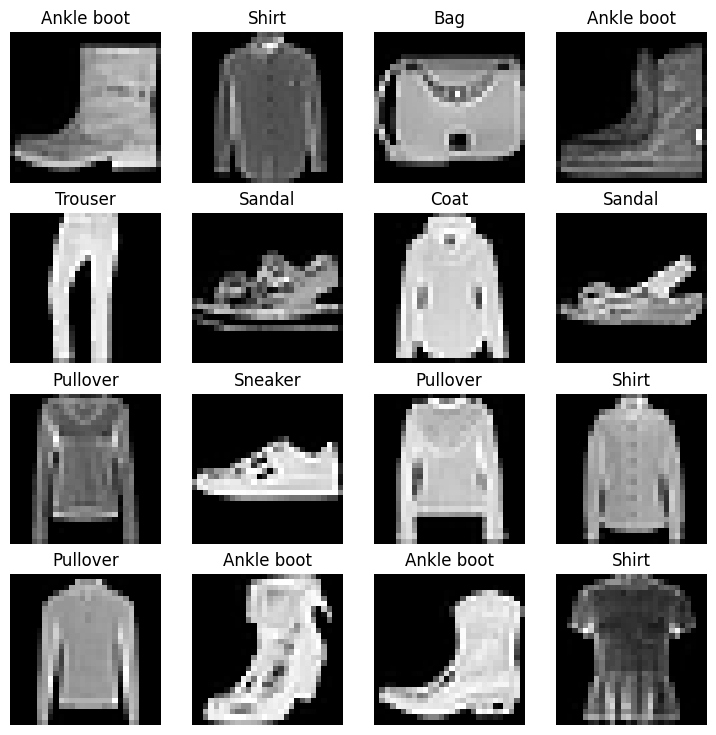

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a4f57fe09d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a4f57efe1d0>)

In [ ]:
len(train_dataloader)

1875

In [ ]:
train_features_batch, train_label_batch = next(iter(train_dataloader))
next(iter(train_dataloader))[0].shape, train_label_batch.shape, next(iter(train_dataloader))[1].shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]), torch.Size([32]))

In [ ]:
next(iter(train_dataloader))[1]

tensor([4, 3, 6, 5, 4, 6, 9, 7, 5, 9, 9, 2, 2, 6, 0, 9, 0, 6, 8, 9, 0, 5, 9, 5,
        1, 9, 3, 6, 7, 5, 1, 4])

Text(0.5, 1.0, '11 - Coat')

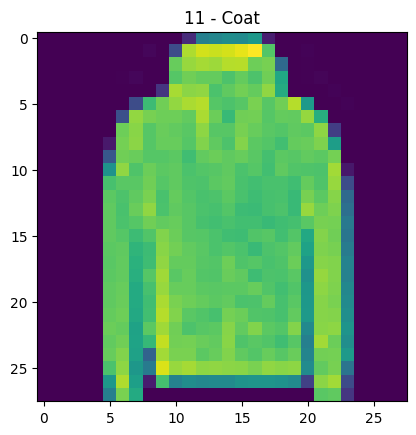

In [ ]:
img, label = next(iter(train_dataloader))
random_num = torch.randint(0, len(label), (1,))
plt.imshow(img[random_num].squeeze())
plt.title(f"{random_num.item()} - {class_names[label[random_num]]}")

### Model 0 - Linear Model

In [ ]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
x.shape, output.shape, output.squeeze().shape, output.squeeze().shape[0]

(torch.Size([1, 28, 28]), torch.Size([1, 784]), torch.Size([784]), 784)

In [ ]:
# We do not add a softmax end layer because of the CrossEntropyLoss function already use it internally
class FashionMNISTModel(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.Linear(hidden_units, output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
available_device = "cuda" if torch.cuda.is_available() else "cpu"
available_device

'cpu'

In [ ]:
torch.manual_seed(42)
model_untrained = FashionMNISTModel(output.squeeze().shape[0], 10, len(class_names)).to(available_device)
model_0 = FashionMNISTModel(output.squeeze().shape[0], 10, len(class_names)).to(available_device)
model_0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
str(next(model_0.parameters()).device)

'cpu'

In [ ]:
# untrained model composed by random weights and biases
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0296,  0.0224, -0.0181,  ...,  0.0004,  0.0355, -0.0293],
                      [-0.0290,  0.0062,  0.0239,  ...,  0.0027,  0.0102, -0.0129],
                      [ 0.0235,  0.0318,  0.0348,  ..., -0.0150, -0.0323, -0.0270],
                      ...,
                      [ 0.0066, -0.0201,  0.0322,  ...,  0.0104, -0.0022,  0.0090],
                      [ 0.0300,  0.0132,  0.0252,  ...,  0.0304,  0.0141, -0.0189],
                      [-0.0134,  0.0170, -0.0218,  ..., -0.0105,  0.0029, -0.0044]])),
             ('layer_stack.1.bias',
              tensor([ 0.0155, -0.0296,  0.0081, -0.0277,  0.0282, -0.0141,  0.0073,  0.0024,
                      -0.0142, -0.0048])),
             ('layer_stack.2.weight',
              tensor([[ 0.3008, -0.1599, -0.0822,  0.2084,  0.1857,  0.0875, -0.2767, -0.0510,
                       -0.3116, -0.1563],
                      [-0.0338, -0.1195,  0.1298,  0.0032,  0.0622,  0.0927,  0.

### Model 0 - Linear Model - Try untrained model

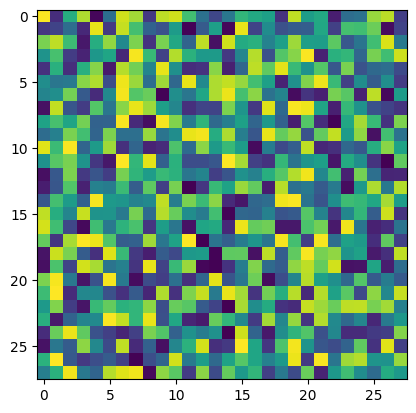

In [ ]:
# create a random image to try the untrained model
dummy_x = torch.rand([1, 1, 28, 28])
plt.imshow(dummy_x.squeeze())

In [ ]:
with torch.inference_mode():
  result = model_0(dummy_x)
result

tensor([[ 0.0918, -0.1251,  0.2167,  0.0399,  0.0716,  0.1289,  0.0738, -0.0979,
          0.1968,  0.2454]])

In [ ]:
normalized_probabilities = nn.functional.softmax(result, dim=1)
normalized_probabilities

tensor([[0.1001, 0.0806, 0.1134, 0.0950, 0.0981, 0.1039, 0.0983, 0.0828, 0.1112,
         0.1167]])

In [ ]:
print(f"{class_names[torch.argmax(result)]} - {normalized_probabilities.squeeze()[torch.argmax(result)].item() * 100:.2f}%")

Ankle boot - 11.67%


Text(0.5, 1.0, '31 - Bag')

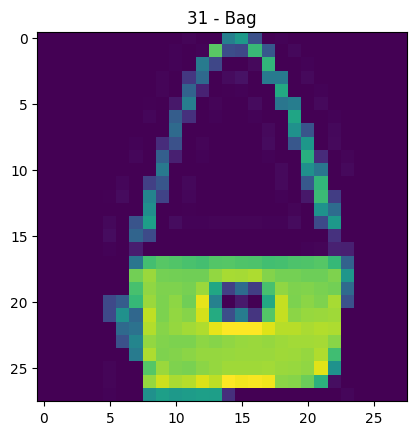

In [ ]:
# try the untrained model with a random test image (it will fail or it will produce uncertain predictions)
img, label = next(iter(test_dataloader))
random_num = torch.randint(0, len(label), (1,))
img_selected = img[random_num]
plt.imshow(img[random_num].squeeze())
plt.title(f"{random_num.item()} - {class_names[label[random_num]]}")

In [ ]:
with torch.inference_mode():
  result2 = model_0(img_selected)
result2

tensor([[ 0.2202, -0.0308,  0.1246,  0.0942,  0.1652,  0.1427, -0.1042, -0.0507,
          0.3156,  0.0253]])

In [ ]:
normalized_probabilities2 = nn.functional.softmax(result2, dim=1)
normalized_probabilities2

tensor([[0.1130, 0.0879, 0.1027, 0.0996, 0.1070, 0.1046, 0.0817, 0.0862, 0.1243,
         0.0930]])

In [ ]:
index_selected = torch.argmax(result2)
print(f"{index_selected} - {class_names[index_selected]} - {normalized_probabilities2.squeeze()[index_selected].item() * 100:.2f}%")

8 - Bag - 12.43%


### Model 0 - Linear Model - Loss, Accuracy, Optimizer

In [ ]:
# loss, optimizer and evaluation metrics functions
loss_fn = nn.CrossEntropyLoss()
optimizer0 = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.
    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.
    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
# time experiment function
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device=None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### Model 0 - Linear Model - Training loop

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
start_time = timer()
epochs = 3

model_0.train()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch + 1}")
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    y_pred = model_0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer0.zero_grad()
    loss.backward()
    optimizer0.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  train_loss /= len(train_dataloader)


  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}\n")

end_time = timer()
total_time_train = print_train_time(start_time, end_time, str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.5899 | Test loss: 0.5029, Test acc: 82.3782

Epoch: 2
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.4768 | Test loss: 0.4816, Test acc: 83.0571

Epoch: 3
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.4549 | Test loss: 0.4791, Test acc: 83.4465

Train time on cpu: 29.985 seconds


Text(0.5, 1.0, '31 - Bag')

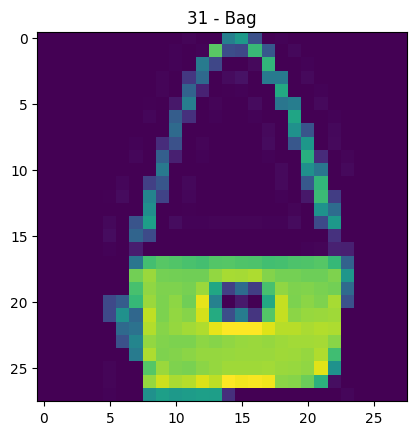

In [ ]:
# show again the same image selected
test_image_selected = img[random_num]
plt.imshow(img[random_num].squeeze())
plt.title(f"{random_num.item()} - {class_names[label[random_num]]}")

In [ ]:
# try the trained model with the same random test image selected before
with torch.inference_mode():
  result3 = model_0(img_selected)
result3

tensor([[ 3.4226, -3.9922,  2.1689,  4.4035,  1.5055, -2.0257,  2.4320, -5.0679,
          6.2636, -6.1988]])

In [ ]:
normalized_probabilities3 = nn.functional.softmax(result3, dim=1)
normalized_probabilities3

tensor([[4.6275e-02, 2.7871e-05, 1.3210e-02, 1.2341e-01, 6.8040e-03, 1.9915e-04,
         1.7185e-02, 9.5062e-06, 7.9287e-01, 3.0678e-06]])

In [ ]:
index_selected3 = torch.argmax(result3)
print(f"{index_selected3} - {class_names[index_selected3]} - {normalized_probabilities3.squeeze()[index_selected3].item() * 100:.2f}%")

8 - Bag - 79.29%


In [ ]:
# previous wrong or uncertain inference
print(f"{index_selected} - {class_names[index_selected]} - {normalized_probabilities2.squeeze()[index_selected].item() * 100:.2f}%")

8 - Bag - 12.43%


### Model 0 - Linear Model - Evaluation and Predictions

In [ ]:
# having argmax(dim=1), we use dim=1 to apply the argmax function comparing elements in the row not in columns as dim=0 do
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

  """ Returns a dictionary containing the results of model predicting on data_loader"""

  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_acc": f"{acc:4f}",
          "model_loss": f"{loss.item():.4f}",
          }

In [ ]:
# eval untrained model
eval_model(model_untrained, test_dataloader, loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel',
 'model_acc': '10.852636',
 'model_loss': '2.3191'}

In [ ]:
# eval trained model
model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel',
 'model_acc': '83.446486',
 'model_loss': '0.4791'}

### Model 1 - Non-Linear Model

In [ ]:
class FashionMNISTModelNonLinear(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
output.squeeze().shape[0], len(class_names)

(784, 10)

In [ ]:
model_1 = FashionMNISTModelNonLinear(output.squeeze().shape[0], 10, len(class_names)).to(available_device)
model_1

FashionMNISTModelNonLinear(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0315, -0.0262,  0.0310,  ...,  0.0344, -0.0162,  0.0241],
                      [ 0.0181, -0.0299,  0.0230,  ..., -0.0213,  0.0084, -0.0042],
                      [-0.0162,  0.0150,  0.0003,  ...,  0.0155,  0.0046,  0.0110],
                      ...,
                      [ 0.0105,  0.0343,  0.0217,  ...,  0.0088,  0.0018, -0.0136],
                      [-0.0354, -0.0044,  0.0154,  ...,  0.0233, -0.0098, -0.0313],
                      [ 0.0015, -0.0051,  0.0102,  ...,  0.0037, -0.0302, -0.0123]])),
             ('layer_stack.1.bias',
              tensor([ 0.0018,  0.0163,  0.0069, -0.0078,  0.0002,  0.0307,  0.0238,  0.0122,
                      -0.0257, -0.0120])),
             ('layer_stack.3.weight',
              tensor([[ 0.2019,  0.2847, -0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514,
                       -0.3130, -0.0118],
                      [ 0.0932, -0.1864,  0.2488,  0.1500,  0.1907,  0.1457, -0.

In [ ]:
from tqdm.auto import tqdm
def trainingLoop(model:nn.Module,
                 optimizer:torch.optim,
                 loss_fn:nn.Module,
                 train_dataloader:DataLoader,
                 test_dataloader:DataLoader,
                 epochs:int=3
                 ):

  torch.manual_seed(42)
  start_time = timer()
  model.train()

  for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch + 1}")
    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
      # model.train()
      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      train_loss += loss

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    train_loss /= len(train_dataloader)


    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
      for X_test, y_test in test_dataloader:
        test_pred = model(X_test)
        test_loss += loss_fn(test_pred, y_test)
        test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

      test_loss /= len(test_dataloader)
      test_acc /= len(test_dataloader)

    print(f"Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}\n")

  end_time = timer()
  total_time_train = print_train_time(start_time, end_time, str(next(model.parameters()).device))


In [ ]:
# Same loss and accuracy functionas before but a new optimizer
optimizer1 = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
trainingLoop(model_1, optimizer1, loss_fn, train_dataloader, test_dataloader)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.6704 | Test loss: 0.5126, Test acc: 81.5994

Epoch: 2
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.4766 | Test loss: 0.4906, Test acc: 82.1985

Epoch: 3
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.4448 | Test loss: 0.4633, Test acc: 83.4265

Train time on cpu: 30.646 seconds


### Model 1 - Non-Linear Model - Evaluation

In [ ]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelNonLinear',
 'model_acc': '83.426518',
 'model_loss': '0.4633'}

In [ ]:
eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel',
 'model_acc': '83.446486',
 'model_loss': '0.4791'}

### Model 2 - Convolutional Model - Test a Convolutional Layer

In [ ]:
dummy_images = torch.randn(size=(32,3,64,64))
single_dummy_image = dummy_images[0]
single_dummy_image.shape, single_dummy_image

(torch.Size([3, 64, 64]),
 tensor([[[-0.4934,  0.2415, -1.1109,  ...,  1.4332,  0.7440, -0.4816],
          [-0.6021,  0.9604,  0.4048,  ...,  0.5214,  0.3488,  0.9676],
          [-2.2933,  0.4976, -0.4257,  ..., -0.0335, -0.3980,  1.0805],
          ...,
          [-0.3047, -0.2240,  0.2505,  ..., -1.1975, -0.4352,  0.5881],
          [ 0.2135, -0.9207,  1.3648,  ..., -2.3232, -0.6069,  0.9368],
          [ 0.5625, -1.3328,  0.3251,  ...,  1.7354, -0.3299,  0.3301]],
 
         [[-0.1551, -0.4295, -1.0249,  ...,  0.6517,  0.9505, -1.5345],
          [-2.5638,  0.3786, -0.1196,  ...,  0.4985, -0.6613,  0.8029],
          [-2.7346,  1.4190, -1.1141,  ..., -0.3941,  0.6646, -2.1910],
          ...,
          [-0.3496,  0.2812,  0.5629,  ...,  1.7292,  1.5932,  0.8239],
          [-0.8998,  1.0082,  0.2779,  ...,  1.3435, -0.4381, -1.3862],
          [-0.1498,  1.2587,  1.4500,  ...,  0.4126, -0.6365, -0.2000]],
 
         [[ 1.5107,  1.1271,  0.4759,  ..., -1.2594, -1.2911,  0.6972],
  

In [ ]:
dummy_conv_layer = nn.Conv2d(in_channels=3,
                             out_channels=10,
                             kernel_size=3,
                             stride=1,
                             padding=1)

In [ ]:
dummy_result = dummy_conv_layer(single_dummy_image)
dummy_result.shape

torch.Size([10, 64, 64])

In [ ]:
def create_dummy_conv(dummy_in_channels:int,
                      dummy_out_channels:int,
                      dummy_kernel_size:int,
                      dummy_stride:int,
                      dummy_padding:int):
  return nn.Conv2d(dummy_in_channels,
                   dummy_out_channels,
                   dummy_kernel_size,
                   dummy_stride,
                   dummy_padding)

In [ ]:
create_dummy_conv(3, 10, 8, 3, 0)(single_dummy_image).shape

torch.Size([10, 19, 19])

### Model 2 - Convolutional Model

In [ ]:
class FashionMNISTModelCNN(nn.Module):
  def __init__(self, input_shape:int, hidden_unit:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=output_shape,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_unit,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    print(x.shape)
    return x

In [ ]:
# we have only one channel for color, it is a graysacale not a RGB thrn imput_shape=1
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelCNN(input_shape=1, hidden_unit=10, output_shape=len(class_names)).to(available_device)
model_2

FashionMNISTModelCNN(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
)

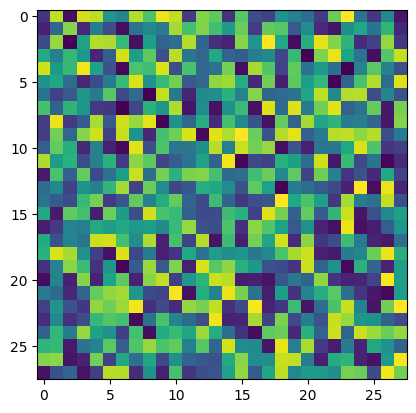

In [ ]:
dummy_img2 = torch.rand(size=(1,28,28))
plt.imshow(dummy_img2.squeeze())

### Model 2 - Convolutional Model - Typical shape error

In [ ]:
# with torch.inference_mode():
#   result4 = model_2(dummy_img2.unsqueeze(0))
# result4



# torch.Size([1, 10, 14, 14])
# torch.Size([1, 10, 7, 7])
# ---------------------------------------------------------------------------
# RuntimeError                              Traceback (most recent call last)
# <ipython-input-67-35cd8b96118d> in <cell line: 0>()
#       1 with torch.inference_mode():
# ----> 2   result4 = model_2(dummy_img2.unsqueeze(0))
#       3 result4

# 8 frames
# /usr/local/lib/python3.11/dist-packages/torch/nn/modules/linear.py in forward(self, input)
#     123
#     124     def forward(self, input: Tensor) -> Tensor:
# --> 125         return F.linear(input, self.weight, self.bias)
#     126
#     127     def extra_repr(self) -> str:

# RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x490 and 10x10)



# due to the fact that I do not see the print just after apply classifier layer, I know classifier layer has a issue
# It say: shapes cannot be multiplied (10x490 and 10x10) --> layer does not fit, instead of 10 has to be 490 to fit with the flatten output
# nn.Linear(in_features=hidden_unit, --> nn.Linear(in_features=490),

In [ ]:
class FashionMNISTModelCNN(nn.Module):
  def __init__(self, input_shape:int, hidden_unit:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=output_shape,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_unit*7*7, # <--
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

### Model 2 - Convolutional Model - Try untrained model

In [ ]:
dummy_img2.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
# test CNN untrained model
model_2 = FashionMNISTModelCNN(input_shape=1, hidden_unit=10, output_shape=len(class_names)).to(available_device)
with torch.inference_mode():
  result4 = model_2(dummy_img2.unsqueeze(0))
result4

tensor([[ 0.0586,  0.0167, -0.0102, -0.0127, -0.0058, -0.0146, -0.0265, -0.0603,
          0.0050,  0.0263]])

In [ ]:
print(f"{class_names[torch.argmax(result4)]} - {nn.functional.softmax(result4, dim=1).squeeze()[torch.argmax(result4)].item() * 100:.2f}%")

T-shirt/top - 10.62%


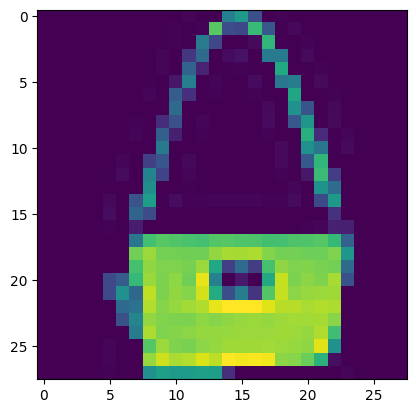

In [ ]:
plt.imshow(test_image_selected.squeeze())

In [ ]:
test_image_selected.shape, test_image_selected.squeeze(0).shape, test_image_selected.squeeze().shape

(torch.Size([1, 1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([28, 28]))

In [ ]:
with torch.inference_mode():
  result5 = model_2(test_image_selected)
result5

tensor([[ 0.0581,  0.0141,  0.0025, -0.0153, -0.0086,  0.0009, -0.0217, -0.0475,
          0.0029,  0.0328]])

In [ ]:
nn.functional.softmax(result5, dim=1)

tensor([[0.1057, 0.1012, 0.1000, 0.0983, 0.0989, 0.0999, 0.0976, 0.0952, 0.1001,
         0.1031]])

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
print(f"{class_names[torch.argmax(result5)]} - {nn.functional.softmax(result5, dim=1).squeeze()[torch.argmax(result5)].item() * 100:.2f}%")

T-shirt/top - 10.57%


### Model 2 - Convolutional Model - Loss, Accuarcy, Optimizer and Train

In [ ]:
loss_fn

CrossEntropyLoss()

In [ ]:
accuracy_fn

<function __main__.accuracy_fn(y_true, y_pred)>

In [ ]:
optimizer2 = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
trainingLoop(model_2, optimizer2, loss_fn, train_dataloader, test_dataloader)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.7053 | Test loss: 0.3964, Test acc: 85.9325

Epoch: 2
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.3625 | Test loss: 0.3555, Test acc: 86.9309

Epoch: 3
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.3183 | Test loss: 0.3114, Test acc: 88.4285

Train time on cpu: 154.296 seconds


### Model 2 - Convolutional Model - Evaluation

In [ ]:
def eval_model_on_image(model:nn.Module, image:torch.tensor, class_names:list):

  with torch.inference_mode():
    logits = model(image)
    max_index = torch.argmax(logits)
    probabilities = nn.functional.softmax(logits, dim=1)
    text = f"{class_names[max_index]} - {probabilities.squeeze()[max_index].item() * 100:.2f}%"

  # probabilities_dict = {}
  # for i, probability in enumerate(probabilities.squeeze()):
  #   probabilities_dict[class_names[i]] = f"{probability.item() * 100:.2f}%"

  return {
    "text": text,
    "probabilities": probabilities.squeeze(),
    "logits": logits.squeeze()
  }

In [ ]:
def eval_model_on_image_simple(model:nn.Module, image:torch.tensor, class_names:list):
  with torch.inference_mode():
    logits = model(image)
    max_index = torch.argmax(logits)
    probabilities = nn.functional.softmax(logits, dim=1)
    text = f"{class_names[max_index]} - {probabilities.squeeze()[max_index].item() * 100:.2f}%"

  return {
    "index": max_index,
    "text": text
  }

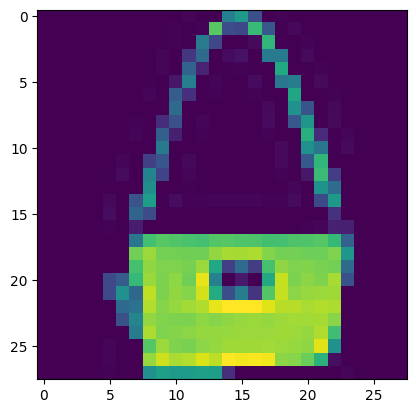

In [ ]:
plt.imshow(test_image_selected.squeeze())

In [ ]:
result = eval_model_on_image(model_2, test_image_selected, class_names)
result

{'text': 'Bag - 98.49%',
 'probabilities': tensor([4.9100e-04, 1.2216e-04, 2.3430e-03, 7.2402e-04, 7.5686e-03, 3.7954e-03,
         9.5939e-05, 1.5121e-06, 9.8485e-01, 4.0441e-06]),
 'logits': tensor([-0.1259, -1.5170,  1.4368,  0.2624,  2.6094,  1.9192, -1.7587, -5.9089,
          7.4779, -4.9251])}

In [ ]:
model_2_results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelCNN',
 'model_acc': '88.428514',
 'model_loss': '0.3114'}

### Comparing results

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_acc,model_loss
0,FashionMNISTModel,83.446486,0.4791
1,FashionMNISTModelNonLinear,83.426518,0.4633
2,FashionMNISTModelCNN,88.428514,0.3114


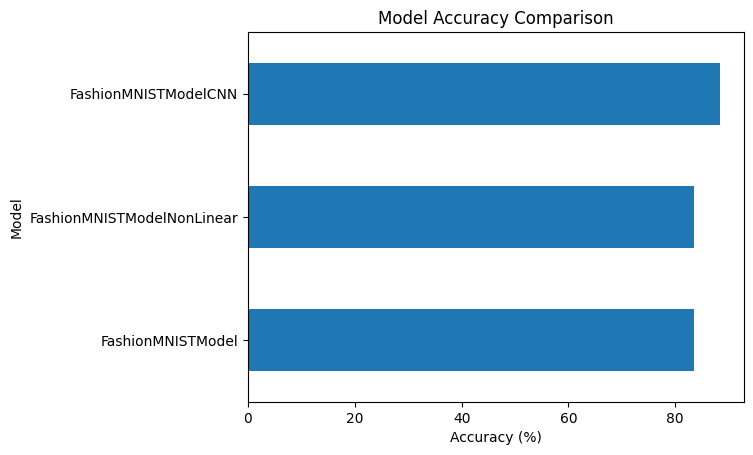

In [ ]:
compare_results["model_acc"] = pd.to_numeric(compare_results["model_acc"], errors='coerce')
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")

plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison")
plt.show()

### Making predictions

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [ ]:
def simple_eval_model_on_data(model:nn.Module, data:list[torch.tensor]):
  result = []
  with torch.inference_mode():
    for image in data:
      result.append(torch.argmax(model(image.unsqueeze(0))).item())
  return result

In [ ]:
evaluation_results = simple_eval_model_on_data(model_2, test_samples)
evaluation_results

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [ ]:
def simple_eval_model_on_data2(model:nn.Module, data:list[torch.tensor], class_names:list):
  result = []
  with torch.inference_mode():
    for image in data:
      processed = model(image.unsqueeze(0))#.squeeze()
      selected = torch.argmax(processed.squeeze()).item()
      max_probability = nn.functional.softmax(processed, dim=1).squeeze()[selected]* 100
      label = class_names[selected]
      result.append(f"{label} - {max_probability:.2f}%")
  return result

In [ ]:
evaluation_results2 = simple_eval_model_on_data2(model_2, test_samples, class_names)
evaluation_results2

['Sandal - 99.97%',
 'Trouser - 74.39%',
 'Sneaker - 90.07%',
 'Coat - 65.96%',
 'Dress - 81.30%',
 'T-shirt/top - 76.88%',
 'Coat - 95.34%',
 'Sneaker - 98.84%',
 'Trouser - 99.98%']

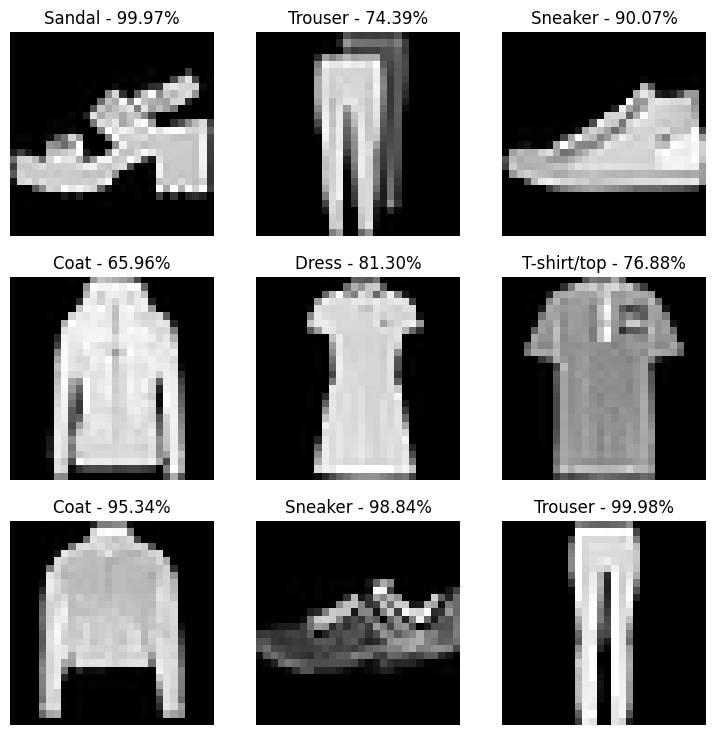

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  plt.title(evaluation_results2[i] if test_labels[i] == evaluation_results[i] else f"{class_names[test_labels[i]]} Vs {class_names[evaluation_results[i]]}")
  plt.axis(False)
  aux = eval_model_on_image_simple(model_2, test_image_selected, class_names)

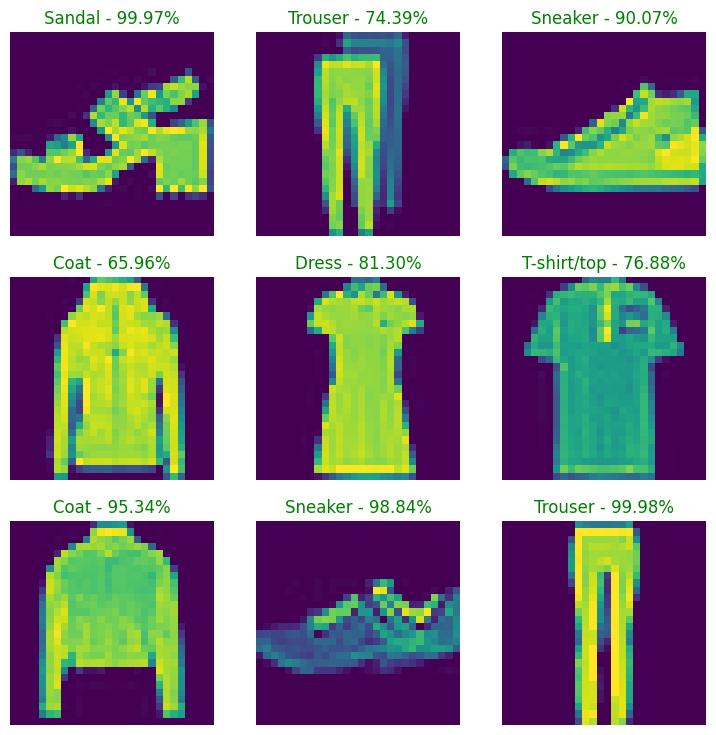

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze())
  plt.axis(False)

  result = eval_model_on_image_simple(model_2, sample.unsqueeze(0), class_names)
  if result["index"] == test_labels[i]:
    plt.title(result["text"], c="g")
  else:
    plt.title(f"{class_names[test_labels[i]]} Vs {result['text']}", c="r")

### Confusion Matrix

In [ ]:
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Generating predictions"):
    X, y = X.to(available_device), y.to(available_device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

Generating predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
try:
  import torchmetrics, mlxtend
except:
  !pip install -q torchmetrics -U mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 827.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.8 MB/s eta 0:00:00


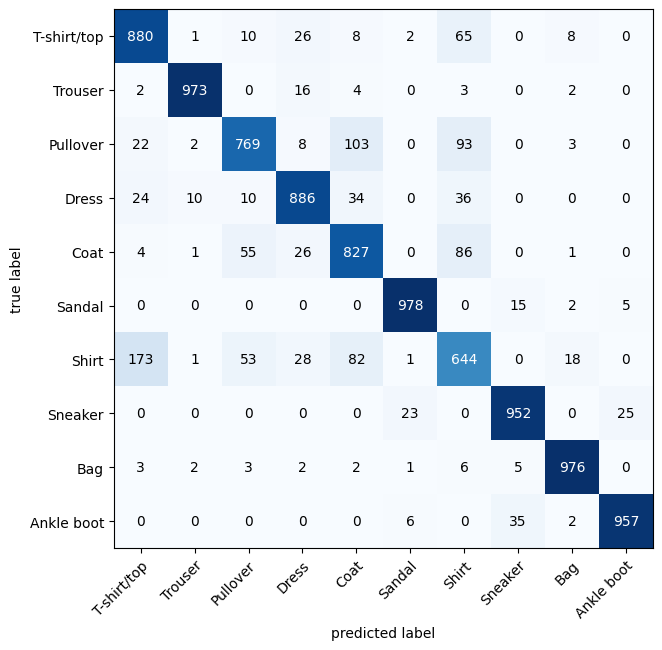

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
);

In [ ]:
# The sandal had the highest accuracy, correctly predicted 978 times out of 1000, and misclassified only 22 times.
# The shirt had the lowest accuracy, correctly predicted 644 times out of 1000, and misclassified only 356 times.

### Save and Load

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_2.state_dict(), MODEL_SAVE_PATH)

In [ ]:
# It is very important to use the same input parameters to create the model as we did the first time (input_shape, hidden_unit, output_shape)
loaded_model_2 = FashionMNISTModelCNN(input_shape=1,
                                      hidden_unit=10,
                                      output_shape=len(class_names)).to(available_device)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    loaded_model_2,
    test_dataloader,
    loss_fn,
    accuracy_fn
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelCNN',
 'model_acc': '88.428514',
 'model_loss': '0.3114'}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelCNN',
 'model_acc': '88.428514',
 'model_loss': '0.3114'}